This notebook shows how to use the global_biases diagnostic.

The `GlobalBiases` class provides an easy interface to plot 2D biases maps for a given experiment and a variables with respect to some observational data.

Let's plot the global mean temperature for the historical experiment, with a comparison done with the same ERA5 time span and 1990-1999 climatology.

In [1]:
from aqua.diagnostics import GlobalBiases, PlotGlobalBiases

As a first step, we initialize the GlobalBias class for both the dataset and the reference data.


In [2]:
biases_ifs_nemo = GlobalBiases(catalog = 'climatedt-phase1', model='IFS-NEMO', exp='historical-1990', source='lra-r100-monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="INFO")

biases_era5 = GlobalBiases(model='ERA5', exp='era5', source='monthly', startdate="1990-01-01", enddate="1999-12-31", loglevel="INFO")

Now we retrieve the data for the target variable (e.g., 'q') and compute its climatology.
The climatology will be stored as a class attribute and can optionally be saved as a NetCDF file.
By setting areas to True, grid cell areas will be saved as an attribute of the class, which can be used for computing weighted statistics.

In [3]:
var = 'q'

biases_ifs_nemo.retrieve(var=var)
biases_ifs_nemo.compute_climatology(seasonal=True, save_netcdf=False, areas=True)

biases_era5.retrieve(var=var)
biases_era5.compute_climatology(seasonal=True, save_netcdf=False, areas=True)

2026-02-13 12:34:40 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-02-13 12:34:40 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-02-13 12:34:40 :: FixerConfigure :: INFO     -> No fixer_name found, only convention will be applied
2026-02-13 12:34:41 :: Reader :: INFO     -> Grid metadata is lon-lat
2026-02-13 12:34:41 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-02-13 12:34:41 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-02-13 12:35:08 :: DataModel :: INFO     -> Applying data model: aqua
2026-02-13 12:35:08 :: CoordIdentifier :: INFO     -> Coordinate 'level' assigned to multiple types: ['depth', 'height']. Selecting 'depth' with highest score 50.
2026-02-13 12:35:08 :: CoordTransformer :: INFO     -> Grid type: Regular
2026-02-13 12:35:08 :: CoordTransformer :: INFO     -> Target data model: aqua
2026-02-13 12:35:0

Now we initialize the plotting class.  
The generated figures can optionally be saved as PNG or PDF files (enabled by default).

In [4]:
plot_biases = PlotGlobalBiases(save_pdf=False, save_png=True, loglevel='INFO')

Let's plot the climatology of variable 'q' at 180 hPa for the IFS-NEMO data:

2026-02-13 12:37:08 :: Global Biases :: INFO     -> Plotting climatology.
2026-02-13 12:37:08 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:10 :: create_folder :: INFO     -> Folder ./png already exists
2026-02-13 12:37:12 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/globalbiases.annual_climatology.climatedt-phase1.IFS-NEMO.historical-1990.r1.q.18000.png
2026-02-13 12:37:12 :: OutputSaver :: INFO     -> Saved PNG: ./png/globalbiases.annual_climatology.climatedt-phase1.IFS-NEMO.historical-1990.r1.q.18000.png


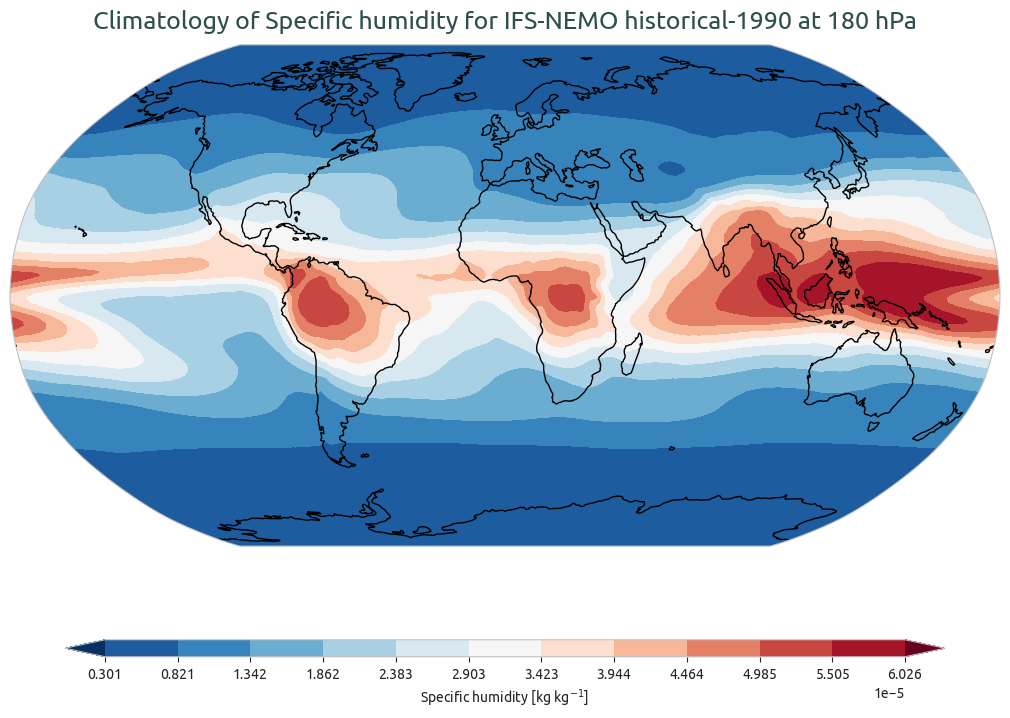

In [5]:
plot_biases.plot_climatology(data=biases_ifs_nemo.climatology, var=var, plev=18000)

Now we plot the total bias map for variable 'q' between IFS-NEMO data and the reference dataset ERA5:


2026-02-13 12:37:12 :: Global Biases :: INFO     -> Plotting global biases.
2026-02-13 12:37:12 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:12 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:13 :: Bias Statistics :: INFO     -> Computing bias statistics for variable q.
2026-02-13 12:37:13 :: FldStat :: WARNING  -> No horizontal dimensions provided, will try to guess from data when provided!
2026-02-13 12:37:13 :: FldStat :: INFO     -> Computing area-weighted mean on ['lon', 'lat'] dimensions
2026-02-13 12:37:13 :: FldStat :: INFO     -> Computing area-weighted mean on ['lon', 'lat'] dimensions
2026-02-13 12:37:13 :: Bias Statistics :: INFO     -> Mean bias: -5.4951e-05 kg kg**-1
2026-02-13 12:37:13 :: Bias Statistics :: INFO     -> RMSE: 6.6837e-05 kg kg**-1
2026-02-13 12:37:13 :: Global Biases :: INFO     -> Added statistics to plot: Mean=-5.5e-05, RMSE=6.7e-05
2026-02-13 12:37

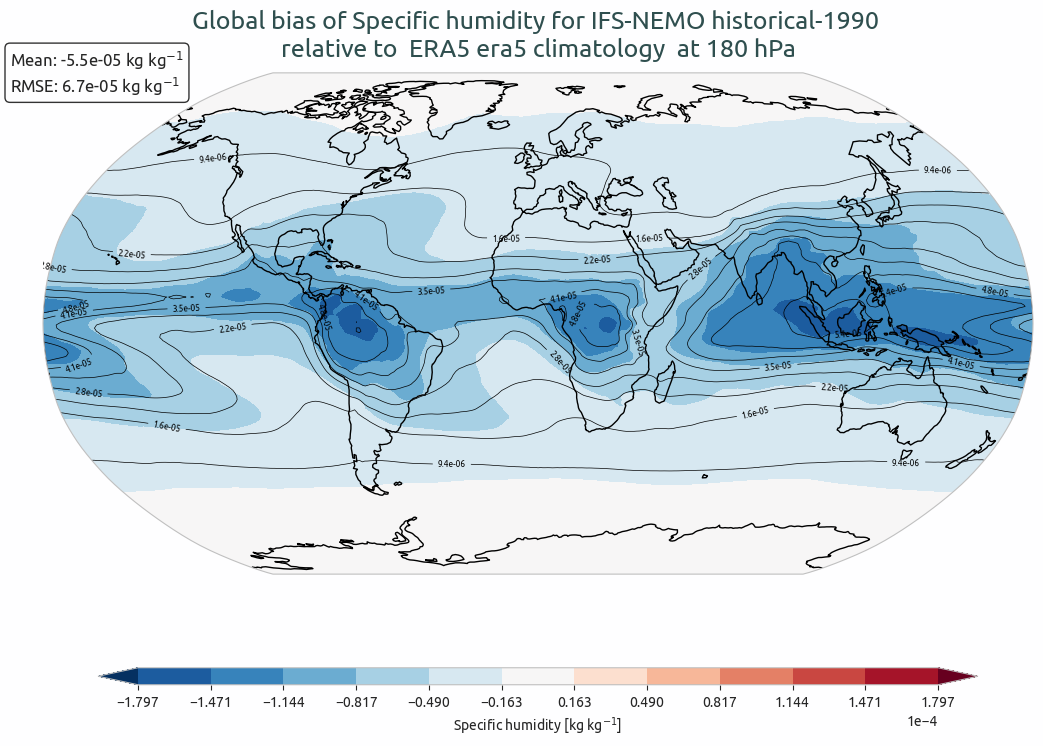

In [6]:
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000, area=biases_ifs_nemo.climatology['cell_area'], show_stats=True)

We can also do a seasonal analysis:

2026-02-13 12:37:15 :: Global Biases :: INFO     -> Plotting seasonal biases.
2026-02-13 12:37:15 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:15 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:18 :: create_folder :: INFO     -> Folder ./png already exists
2026-02-13 12:37:18 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/globalbiases.seasonal_bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.18000.png
2026-02-13 12:37:18 :: OutputSaver :: INFO     -> Saved PNG: ./png/globalbiases.seasonal_bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.18000.png


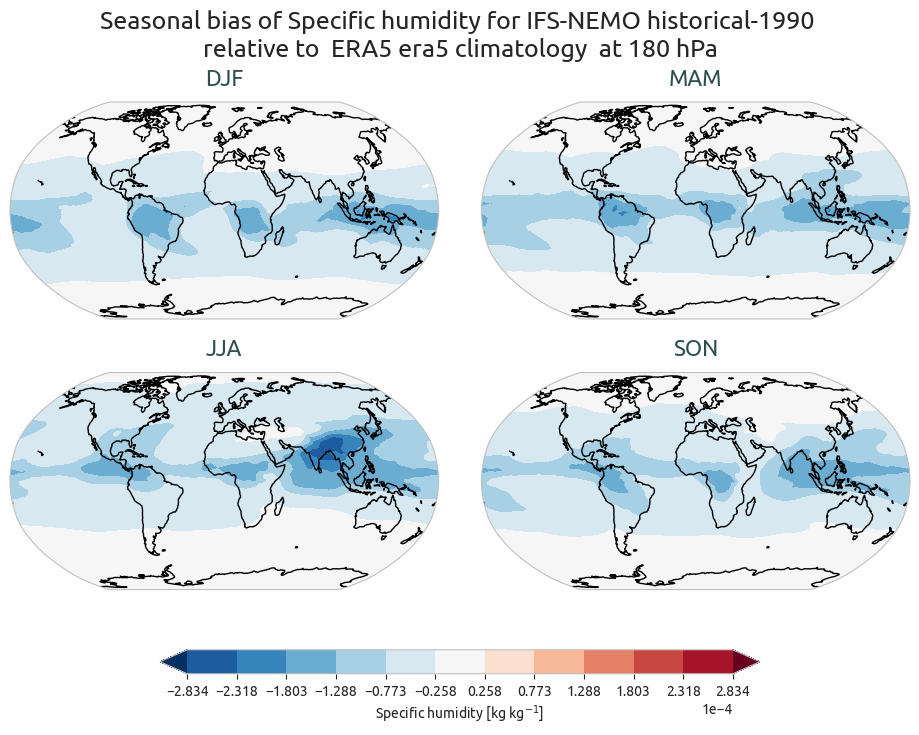

In [7]:
plot_biases.plot_seasonal_bias(data=biases_ifs_nemo.seasonal_climatology, data_ref=biases_era5.seasonal_climatology, var=var, plev=18000)

Finally, we can plot the vertical bias profile as a function of pressure levels:

2026-02-13 12:37:19 :: Global Biases :: INFO     -> Plotting vertical biases for variable: q
2026-02-13 12:37:19 :: create_folder :: INFO     -> Folder ./png already exists
2026-02-13 12:37:19 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/globalbiases.vertical_bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.png
2026-02-13 12:37:19 :: OutputSaver :: INFO     -> Saved PNG: ./png/globalbiases.vertical_bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.png
2026-02-13 12:37:19 :: Global Biases :: INFO     -> Vertical bias plot completed successfully.


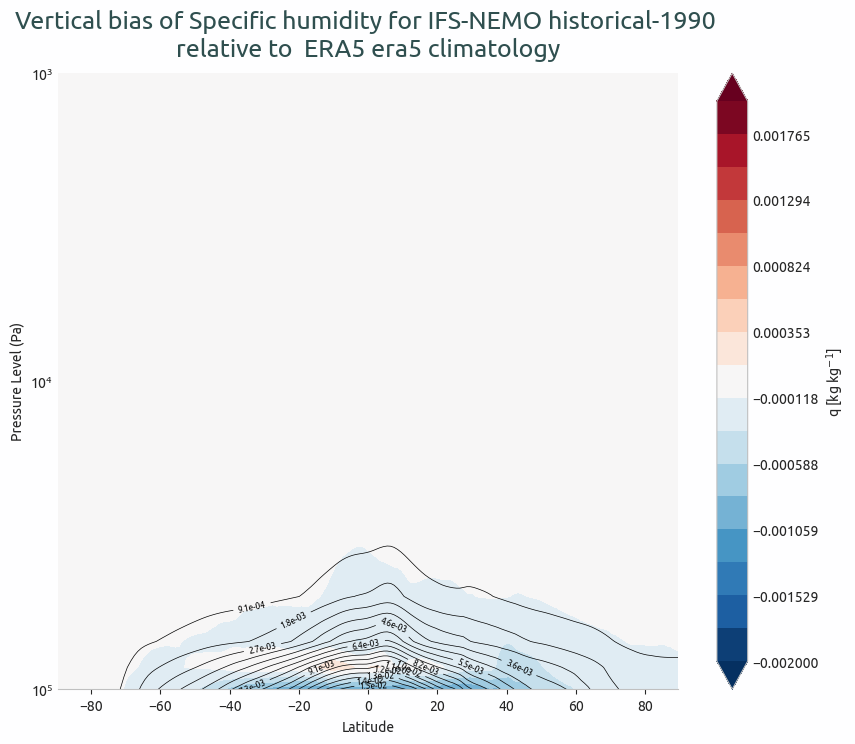

In [8]:
plot_biases.plot_vertical_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var,
                                vmin= -0.002, vmax= 0.002)

Different projections can be used to plot the bias maps. The default is `ccrs.Robinson`, but many others are available (see 'src/aqua/util/projections.py' for the full list). 

2026-02-13 12:37:20 :: Global Biases :: INFO     -> Plotting global biases.
2026-02-13 12:37:20 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:20 :: Pressure levels :: INFO     -> Selecting pressure level 18000 for variable 'q'.
2026-02-13 12:37:20 :: create_folder :: INFO     -> Folder ./png already exists
2026-02-13 12:37:21 :: add_png_metadata :: INFO     -> Metadata added to PNG: ./png/globalbiases.bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.18000.png
2026-02-13 12:37:21 :: OutputSaver :: INFO     -> Saved PNG: ./png/globalbiases.bias.climatedt-phase1.IFS-NEMO.historical-1990.r1.ERA5.era5.q.18000.png


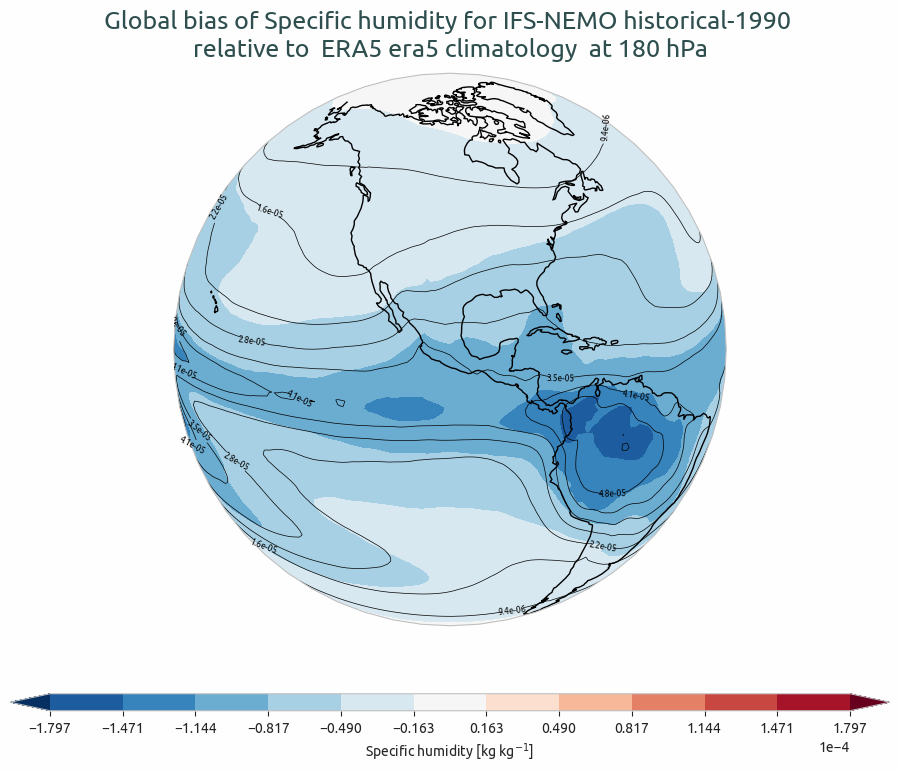

In [9]:
projection = "nearside"
projection_params = {
    "central_longitude": -100,
    "central_latitude": 20,
    "satellite_height": 35785831
}

plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=var, plev=18000, proj=projection,
                      proj_params=projection_params)

The diagnostic is also able to handle the computation of user-defined formulae:

2026-02-13 12:37:21 :: ConfigPath :: INFO     -> IFS-NEMO_historical-1990_lra-r100-monthly triplet found in in climatedt-phase1!
2026-02-13 12:37:22 :: FixerConfigure :: INFO     -> Convention dictionary: eccodes-2.39.0
2026-02-13 12:37:22 :: FixerConfigure :: INFO     -> No fixer_name found, only convention will be applied


2026-02-13 12:37:22 :: Reader :: INFO     -> Grid metadata is lon-lat
2026-02-13 12:37:22 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2026-02-13 12:37:22 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
2026-02-13 12:37:47 :: DataModel :: INFO     -> Applying data model: aqua
2026-02-13 12:37:47 :: CoordIdentifier :: INFO     -> Coordinate 'level' assigned to multiple types: ['depth', 'height']. Selecting 'depth' with highest score 50.
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Grid type: Regular
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Target data model: aqua
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Analysing coordinate: latitude
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Analysing coordinate: longitude
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Analysing coordinate: isobaric
2026-02-13 12:37:47 :: CoordTransformer :: INFO     -> Analysing coordinate: depth
20

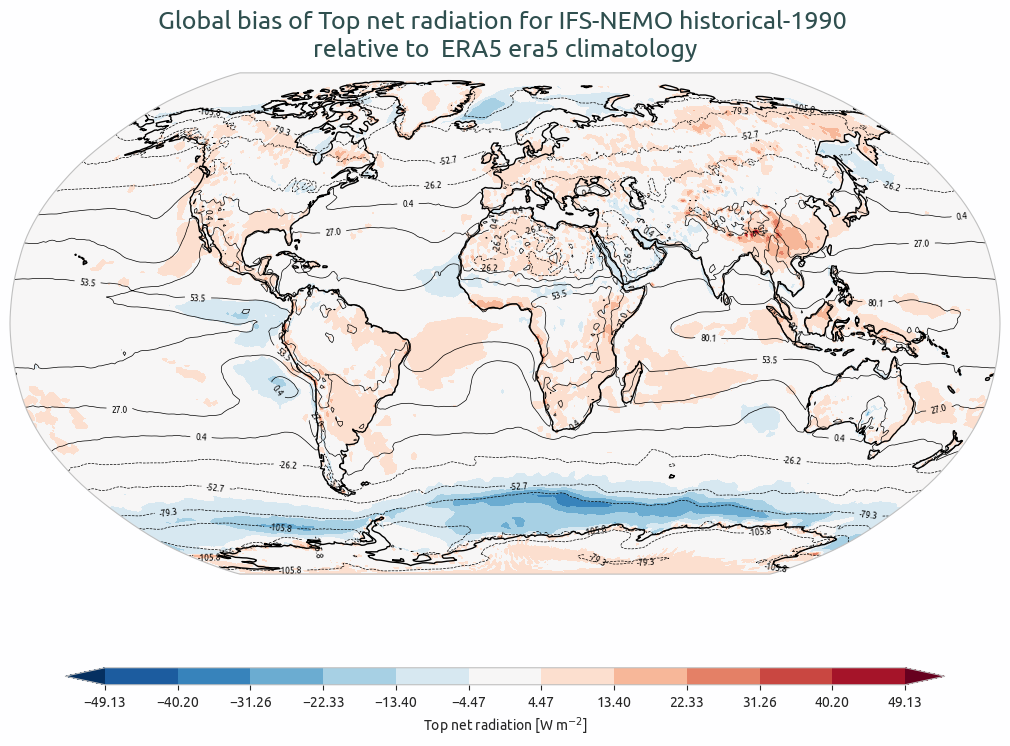

In [10]:
var = 'tnlwrf+tnswrf'
long_name = 'Top net radiation'
short_name = 'tnr'

biases_ifs_nemo.retrieve(formula=True, var=var, long_name=long_name, short_name=short_name)
biases_ifs_nemo.compute_climatology(save_netcdf=False)

biases_era5.retrieve(var=var, formula=True, long_name=long_name, short_name=short_name)
biases_era5.compute_climatology(save_netcdf=False)

plot_biases = PlotGlobalBiases(save_pdf=False, save_png=False, loglevel='INFO')
plot_biases.plot_bias(data=biases_ifs_nemo.climatology, data_ref=biases_era5.climatology, var=short_name, plev=None)